assignment from https://cjtu.github.io/spirl/f21_a2.html

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# assignment data
planet_g_dict = {
    # key    : value
    'mercury': 3.61,
    'venus': 8.83,
    'earth': 9.80665,
    'mars': 3.75,
    'jupiter': 26.0,
    'saturn': 11.2,
    'uranus': 10.5,
    'neptune': 13.3,
}

time_steps = np.array(
    [20, 27.966, 35.931, 43.897, 51.862, 59.828, 67.793, 75.759, 83.724, 91.69, 99.655, 107.621, 115.586, 123.552,
     131.517, 139.483, 147.448, 155.414, 163.379, 171.345, 179.31, 187.276, 195.241, 203.207, 211.172, 219.138, 227.103,
     235.069, 243.034, 251])
fall_distance = np.array(
    [2798.322, 4543.523, 5459.432, 11554.559, 15958.431, 20023.776, 19146.256, 22765.371, 47183.159, 47167.289,
     22978.494, 66253.599, 63625.642, 91050.12, 116941.625, 143460.073, 106462.323, 142584.887, 199564.683, 83593.839,
     158030.907, 205442.175, 206733.665, 241555.039, 236078.303, 240508.665, 311193.102, 298704.903, 339502.307,
     438338.605])
fall_distance_err = np.array(
    [448, 875.919, 1445.964, 2158.136, 3012.435, 4008.861, 5147.413, 6428.093, 7850.899, 9415.832, 18538.153, 21620.131,
     24938.986, 28494.72, 32287.332, 36316.821, 40583.189, 45086.435, 49826.558, 54803.56, 18005.232, 19640.459,
     21346.75, 23124.104, 24972.521, 26892.002, 28882.547, 30944.154, 33076.825, 35280.56])

In [0]:
# get gravity
gravity = np.polyfit(x=time_steps, y=fall_distance, deg=2)[0] * 2
gravity_consider_err = np.polyfit(x=time_steps, y=fall_distance,
                                  w=1 / fall_distance_err, deg=2)[0] * 2

# fit polynomial
free_fall_eqn = np.poly1d(np.polyfit(x=time_steps, y=fall_distance, deg=2))
free_fall_eqn_consider_err = np.poly1d(np.polyfit(x=time_steps, y=fall_distance,
                                                  w=1 / fall_distance_err, deg=2))

# evaluate obtained gravity
delta_gravity = []
for planet_g in list(planet_g_dict.values()):
    delta_gravity.append(abs(gravity - planet_g))
matched_planet = list(planet_g_dict.keys())[np.argmin(delta_gravity)]
# more condense and complicate approaches
matched_planet_consider_err = list(planet_g_dict.keys())[
    np.argmin([abs(gravity_consider_err - planet_g) for planet_g in planet_g_dict.values()])]


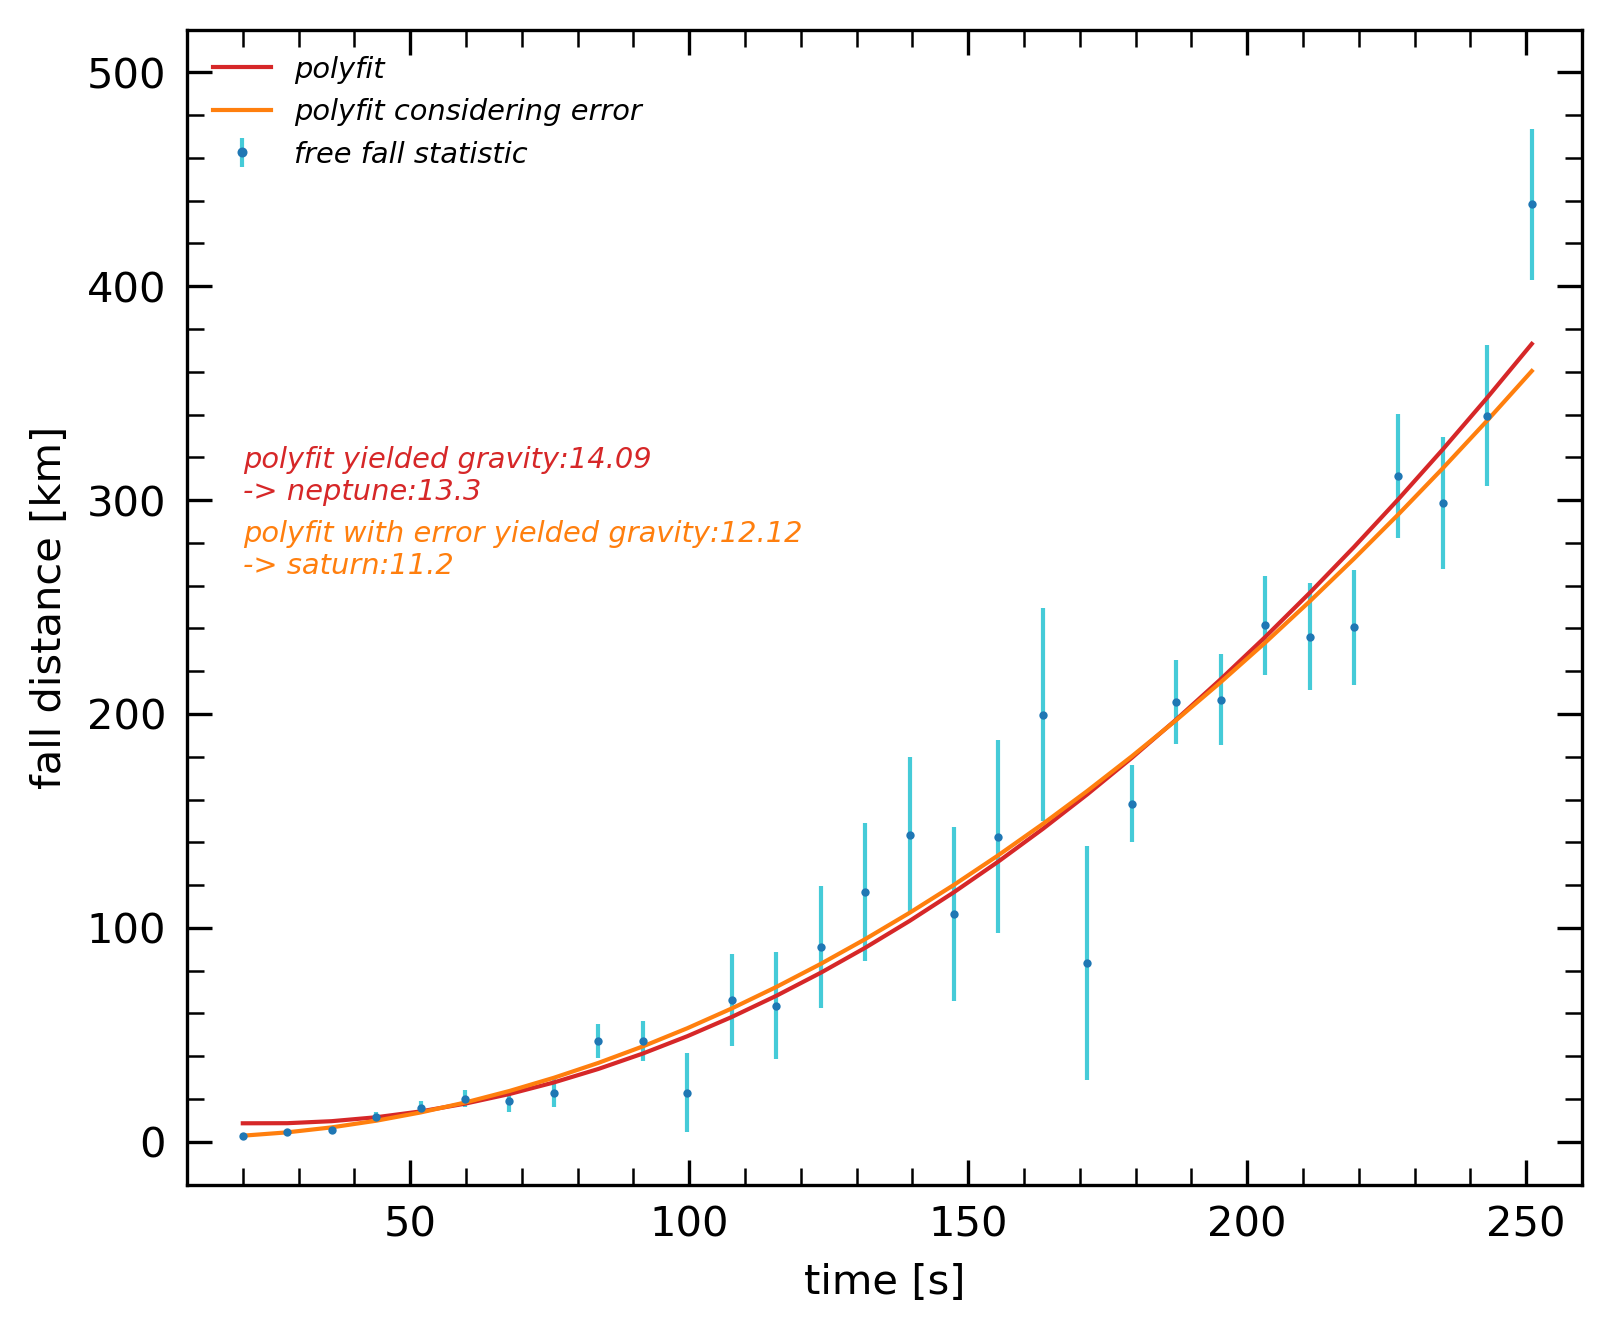

In [3]:
# initialise figure and sub axes
fig, axis = plt.subplots(1, 1, figsize=(6, 5),
                         facecolor='white', dpi=300,
                         gridspec_kw={'hspace': .15, 'wspace': .08})

# plot free fall data
_, caps, bars = axis.errorbar(x=time_steps, y=fall_distance / 10 ** 3,
                              yerr=fall_distance_err / 10 ** 3,
                              marker='.', color='tab:blue', ecolor='tab:cyan',
                              ms=4, mew=0, mec=None,
                              capsize=0, ls='None', lw=1,
                              label='free fall statistic')
[bar.set_alpha(.8) for bar in bars]
[cap.set_alpha(.8) for cap in caps]
# polynomial
axis.plot(time_steps, free_fall_eqn(time_steps) / 10 ** 3,
          c='tab:red', lw=1, label='polyfit')
# polynomial considering error
axis.plot(time_steps, free_fall_eqn_consider_err(time_steps) / 10 ** 3,
          c='tab:orange', lw=1, label='polyfit considering error')

# annotate the matched planet
axis.text(x=.04, y=.6,
          s=f'polyfit yielded gravity:{gravity:.2f}\n'
            f'-> {matched_planet}:{planet_g_dict[matched_planet]}\n',
          color='tab:red',
          verticalalignment='center',
          horizontalalignment='left',
          fontsize='x-small', style='italic', family='sans-serif',
          transform=axis.transAxes)
axis.text(x=.04, y=.55,
          s=f'polyfit with error yielded gravity:{gravity_consider_err:.2f}\n'
            f'-> {matched_planet_consider_err}:{planet_g_dict[matched_planet_consider_err]}',
          color='tab:orange',
          verticalalignment='center',
          horizontalalignment='left',
          fontsize='x-small', style='italic', family='sans-serif',
          transform=axis.transAxes)

# axis attributes
axis.set_xlabel('time [s]', size='medium', style='normal', family='sans-serif')
axis.set_ylabel('fall distance [km]', size='medium', style='normal', family='sans-serif')

axis.minorticks_on()
axis.tick_params(axis='both', right=True, top=True, pad=5,
                 direction='in', length=6, which='major')
axis.tick_params(axis='both', right=True, top=True, pad=5,
                 direction='in', length=4, which='minor')
axis.set_xlim(10, 260)
axis.set_ylim(-20, 520)

axis.legend(loc='upper left', prop={'family': 'sans-serif',
                                    'style': 'italic',
                                    'size': 'x-small'},
            markerscale=1.2, ncols=1,
            frameon=False)

# The polynomial model that takes into account the error in the data provides a better fit 
# compared to the one that does not consider error from the plot. 